# Here we will build a Logistic Regression model from scratch for two classes using a Neural Network Mindset (Using the Forward and backward propagations)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Building The Logistic Regression Model:'
Here first we will transform our testing and training data as: <br>
1. Reshape our data from examples as rows and features as columns to features as rows and examples as column.

In [30]:
def transformer(X_train,X_test,Y_train,Y_test):
  train_y_array = np.array(Y_train) #converting into np array
  train_y_array = train_y_array.reshape(1,Y_train.shape[0]) #casting the examples along the columns
  train_x_array = np.array(X_train).T  #casting the examples along the columns
  test_y_array =  np.array(Y_test)
  test_y_array = test_y_array.reshape(1,Y_test.shape[0]) #casting the examples along the columns
  test_x_array =  np.array(X_test).T #casting the examples along the columns
  print('X_train shape:',train_x_array.shape)
  print('Y_train shape:',train_y_array.shape)
  print('X_test shape:',test_x_array.shape)
  print('Y_test shape:',test_y_array.shape)
  return train_x_array,test_x_array,train_y_array,test_y_array

## Defining Sigmoid function: <br>
$$ A = sigmoid(Z)=  1/(1+ e^-z)$$


In [3]:
def sigmoid(z):   #note z is a matrix containing z = np.dot(W.T,X)
  a = 1/(1+np.exp(-z))
  return a

## Define the model structure (such as number of input features)
    1. Initailize_the_parameters W and b with either zeros or random.
    2. Apply the forward propagation where the activations and cost are calculated (This will be doen for each Iteration).
    3. Next we will optimize the parameters by performing the back propagation in which the gradients are calculated and the parameters are Updated.
    4. Finally the predictions are done with the final updated parameters.

In [4]:
def initialize(dim):    #initializes the parameters
  w = np.zeros((dim,1))  ## W is a columnn matrix of dimension (no of features,1)
  b = 0.
  return w,b

## Forward Propagation
   --> linear --> activation <br>
   1. Here first the linear part is calculated i.e. $$Z = W.T*X +b$$.
   2. Then the non-linear is calculated. $$(A =sigmoid(Z))$$
   3. Then the cost is calculated using the Binary Cross entropy formula. 
   4. Then the gradients are calculated for the corresponding cost function and are saved in the variable grads.
   5. the cost and the gradeints are reutned.

   Note all these steps will be done for each iterations in the later function called Optimize.

In [5]:
def forward(X,w,b,Y):
  m = X.shape[1] #no of examples
  A = sigmoid(np.dot(w.T,X)+b) #Activation
  cost = -(np.dot(Y, np.log(A).T) + np.dot((1-Y), np.log(1-A).T))/m ## Complete cost 
  #grads
  dw = np.dot(X,(A-Y).T)/m  #dw iteration
  db = np.sum(A-Y)/m  # db for one interation
  cost = np.squeeze(np.array(cost)) #making it as dimensionless
  grads= {'dw':dw,
          'db':db}
  return cost,grads


## Optimization
  1.Now here we loop the function **forward** for a no of iteration and calculate the cost and the gradients and update the parameters: $$w = w - α*dw $$ <br>
    $$b = b- α*db$$  <br>

  2. Then it returns the updated parameters and cost in variables params and cost respectively

In [6]:
def optimize(X,w,b,Y,learning_rate, num_iterations,print_cost= False, plot_cost_iteration = False):   # this function will loop the forward function to find the final parameters
  m = X.shape[1]
  costs = []
  iteration_per_hundred= []
  for i in range(num_iterations):
    cost,grads = forward(X,w,b,Y) ## Here we are using the forward function to calculate the cost and gradients
    dw = grads['dw']
    db = grads['db']
    w = w- learning_rate*dw
    b = b - learning_rate*db
    #record the test
    print
    if i%100 == 0:
      costs.append(cost)
      iteration_per_hundred.append(i)
      if print_cost == True:
        print(f'Cost after iteration {i} is {cost}')
  params = {'w' : w,    
           'b': b}   #final updated parameters after iterations
  grads = {'dw':dw,
           'db':db}  #final grads
  if plot_cost_iteration == True:
    plt.style.use('seaborn')
    plt.figure(figsize= (10,10))
    plt.plot(iteration_per_hundred,costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
  return params,grads,costs

## Prediction <br>
Here we finally use our optimized parameters (w and b) to do the final prediction using the sigmoid function. and return the final predictions in Y_predictions row matrix.

In [7]:
def prediction(X,w,b):
  m = X.shape[1]
  Y_prediction = np.zeros((1,m))
  #w = w.reshape
  #Activation predictions final
  A = sigmoid(np.dot(w.T,X)+b)
  #Now converting the predictions 1 if A[i]>=0.5 and 0 if A[i]<0.5
  for i in range(m):
    if A[0,i]>= 00.5:
      Y_prediction[0,i] = 1
    elif  A[0,i]< 00.5:
      Y_prediction[0,i] = 0
  return Y_prediction

## Final Model (Clubbing everything together)

In [8]:
def model(X_train,Y_train,X_test,Y_test,num_iterations = 500,learning_rate = 0.03,print_cost = False,plot_cost_iteration = False):
  dim = X_train.shape[0]
  w, b = initialize(dim) ## Using the initialize function to assign zero values to all parameters
  params,grads,costs = optimize(X_train,w,b,Y_train,learning_rate, num_iterations,print_cost, plot_cost_iteration)
  Y_train_predictions = prediction(X_train,params['w'],params['b'])
  Y_test_predictions = prediction(X_test,params['w'],params['b'])
  if print_cost:
    print(f"train accuracy = {100 - np.mean(np.abs(Y_train_predictions - Y_train)) * 100}")
    print(f"test accuracy = {100 - np.mean(np.abs(Y_test_predictions - Y_test)) * 100}")
  d =  { "Y_prediction_test": Y_test_predictions, 
         "Y_prediction_train" : Y_train_predictions, 
         "w" : params['w'], 
         "b" : params['b'],
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
  return d


## Here we will test our scratch algo with the skleran logistic regression algorithm.

In [9]:
df =  pd.read_csv('./citrus.csv')

In [10]:
df.head(5)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [11]:
df.shape

(10000, 6)

In [12]:
df = shuffle(df)
df.reset_index(inplace=True, drop= True)
df.head()

,name,diameter,weight,red,green,blue
0,orange,6.84,128.30,154,80,17
1,orange,9.66,171.04,159,91,2
2,grapefruit,11.36,196.13,153,70,20
3,orange,7.88,143.76,141,75,20
4,orange,7.36,136.04,151,88,3


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [14]:
df[['red','green','blue']] =df[['red','green','blue']].astype(float)

In [15]:
df.isna().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [16]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [17]:
df = pd.get_dummies(df,drop_first=True)

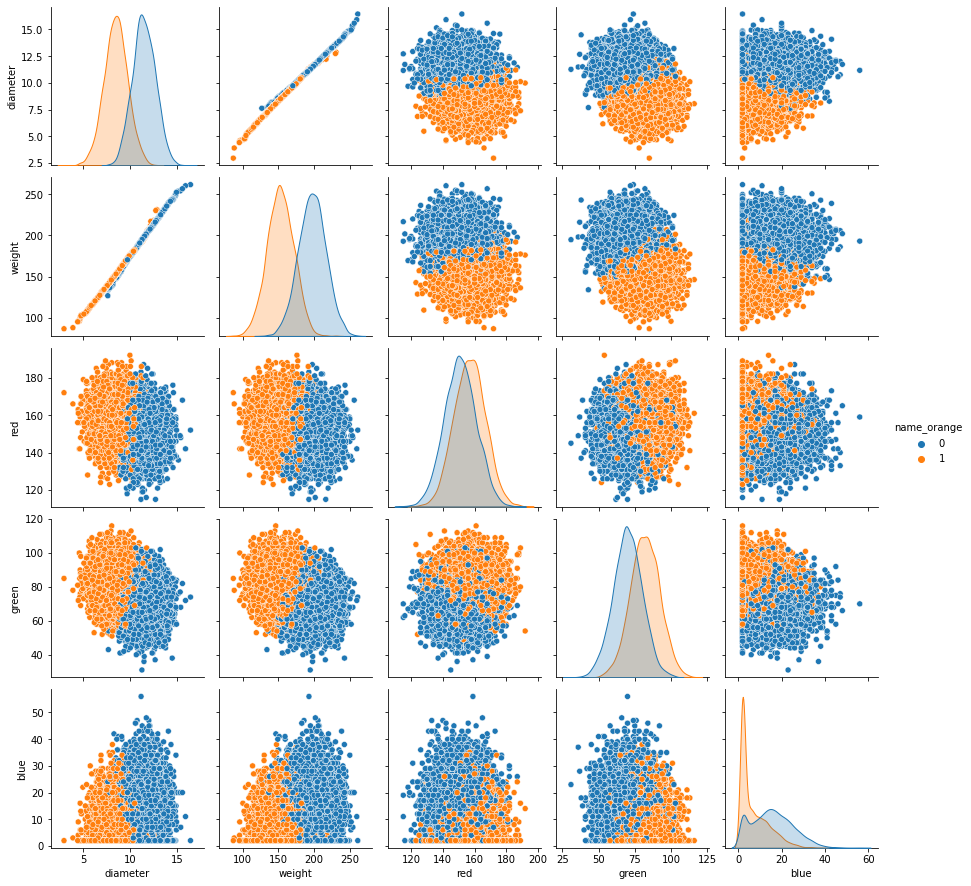

In [18]:
sns.pairplot(df,hue = 'name_orange')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


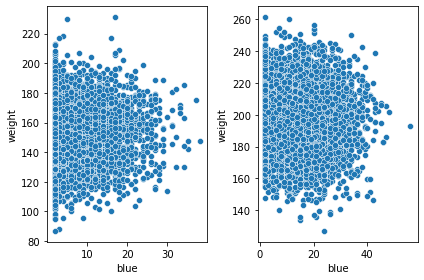

In [19]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
sns.scatterplot(df[df['name_orange']==1]['blue'],df[df['name_orange']==1]['weight'],ax=ax1)
sns.scatterplot(df[df['name_orange']==0]['blue'],df[df['name_orange']==0]['weight'],ax=ax2)
plt.tight_layout()

<AxesSubplot:>

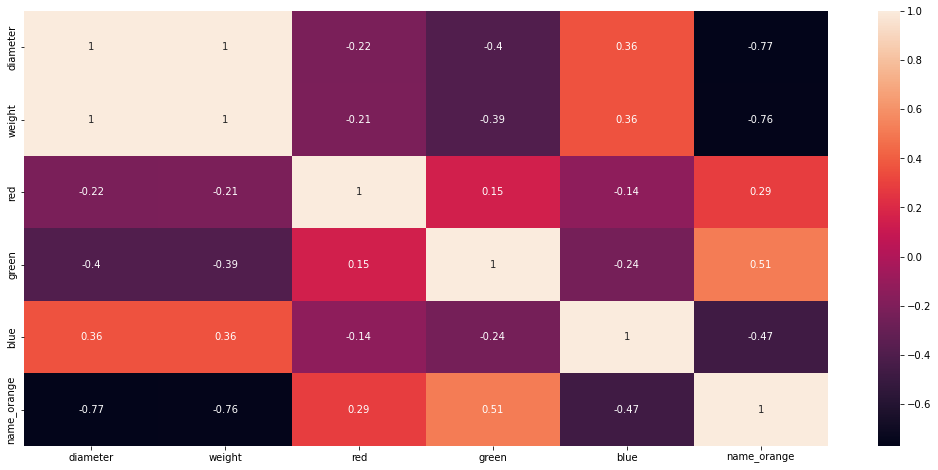

In [20]:
plt.figure(figsize = (18,8))
sns.heatmap(df.corr(),annot=True)

Clearly diameter and wight has high correaltion with each other hence we will drop one of them.

In [21]:
### Checking variation Inflation factor
def VIF_score(df):
  X_new = df.iloc[:,:-1]
  print(X_new.columns)
  from statsmodels.stats.outliers_influence import variance_inflation_factor
  VIF = pd.DataFrame()
  VIF['features'] = X_new.columns.to_list()
  VIF['vif_score'] = [variance_inflation_factor(X_new.values, i) for i in range(len(X_new.columns))]
  VIF.sort_values(by= 'vif_score')
  return VIF

In [22]:
VIF_score(df.iloc[:,:-1])

Index(['diameter', 'weight', 'red', 'green'], dtype='object')


,features,vif_score
0,diameter,10568.985475
1,weight,13506.822725
2,red,188.344326
3,green,51.596868


In [23]:
## Also from VIF we can see that weight has highest VIF score so we will drop the it and then check the vif
df_new = df.drop('weight', axis = 1)

In [24]:
VIF_score(df_new.iloc[:,:-1])

Index(['diameter', 'red', 'green'], dtype='object')


,features,vif_score
0,diameter,22.092566
1,red,73.022263
2,green,41.866910


### we can see that the VIF score has Decreased Significantly

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split( df_new.drop('name_orange',axis=1),df_new['name_orange'], test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6700, 4)
(3300, 4)
(6700,)
(3300,)


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Using the inbuilt sklearn logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train,Y_train)
print('Log_Reg_Score:',lr.score(X_train,Y_train))
predictions = lr.predict(X_train)
from sklearn.metrics import accuracy_score
print('Log_Reg_Score 2:',accuracy_score(predictions,Y_train))

Log_Reg_Score: 0.932089552238806
Log_Reg_Score 2: 0.932089552238806


## Using Our Model

In [28]:
train_x_array,test_x_array,train_y_array,test_y_array = transformer(X_train,X_test,Y_train,Y_test)

X_train shape: (4, 6700)
X_train shape: (1, 6700)
X_train shape: (4, 3300)
X_train shape: (1, 3300)


Cost after iteration 0 is 0.6931471805599468
Cost after iteration 100 is 0.3483659579381803
Cost after iteration 200 is 0.27423362157631626
Cost after iteration 300 is 0.24190128988992848
Cost after iteration 400 is 0.22357646719038263
Cost after iteration 500 is 0.21172192716818108
Cost after iteration 600 is 0.2034186425787654
Cost after iteration 700 is 0.19728655030643935
Cost after iteration 800 is 0.19258366459295928
Cost after iteration 900 is 0.18887347028073953
train accuracy = 93.34328358208955
test accuracy = 92.39393939393939


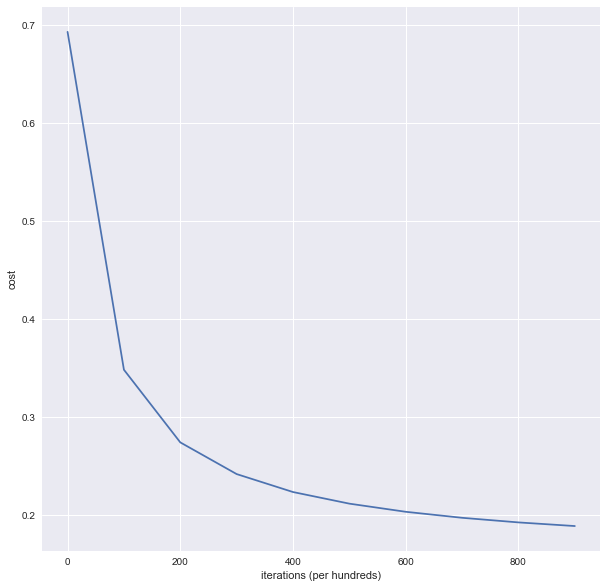

In [29]:
MY_first_logistic_reg_model = model(train_x_array,train_y_array,test_x_array,test_y_array,num_iterations = 1000,learning_rate = 0.03,print_cost = True,plot_cost_iteration = True)

## So here we saw that our logistic regression has almost the same level of accuracy as that of the sklearn logistic regression

In [68]:
df = sns.load_dataset('iris')

In [69]:
df = df[df['species'] != 'setosa']

In [70]:
df.reset_index(drop=True)

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,virginica
96,6.3,2.5,5.0,1.9,virginica
97,6.5,3.0,5.2,2.0,virginica
98,6.2,3.4,5.4,2.3,virginica


In [71]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [72]:
df['species'] = lb.fit_transform(df['species'])

In [73]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [74]:
X_train, X_test, Y_train, Y_test = train_test_split( df.iloc[:,:4],df.iloc[:,-1], test_size=0.33, random_state=42)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',multi_class='multinomial')
lr.fit(X_train,Y_train)
print('Log_Reg_Score:',lr.score(X_train,Y_train))
predictions = lr.predict(X_train)
from sklearn.metrics import accuracy_score
print('Log_Reg_Score 2:',accuracy_score(predictions,Y_train))

Log_Reg_Score: 1.0
Log_Reg_Score 2: 1.0


In [77]:
train_x_array,test_x_array,train_y_array,test_y_array = transformer(X_train,X_test,Y_train,Y_test)

X_train shape: (4, 67)
Y_train shape: (1, 67)
X_test shape: (4, 33)
Y_test shape: (1, 33)


Cost after iteration 0 is 0.6931471805599453
Cost after iteration 100 is 0.3126937700246356
Cost after iteration 200 is 0.23265565555459192
Cost after iteration 300 is 0.19106476616794751
Cost after iteration 400 is 0.164240375986301
Cost after iteration 500 is 0.14517056927551508
Cost after iteration 600 is 0.13080672912512503
Cost after iteration 700 is 0.11955037576533131
Cost after iteration 800 is 0.11046560683092953
Cost after iteration 900 is 0.10296269048163678
Cost after iteration 1000 is 0.09664973564466288
Cost after iteration 1100 is 0.0912554818019877
Cost after iteration 1200 is 0.08658594126602133
Cost after iteration 1300 is 0.08249860301355859
Cost after iteration 1400 is 0.07888636674715337
Cost after iteration 1500 is 0.07566715674482355
Cost after iteration 1600 is 0.07277699501265354
Cost after iteration 1700 is 0.07016525723153005
Cost after iteration 1800 is 0.06779134803816855
Cost after iteration 1900 is 0.06562232344955327
train accuracy = 100.0
test accuracy 

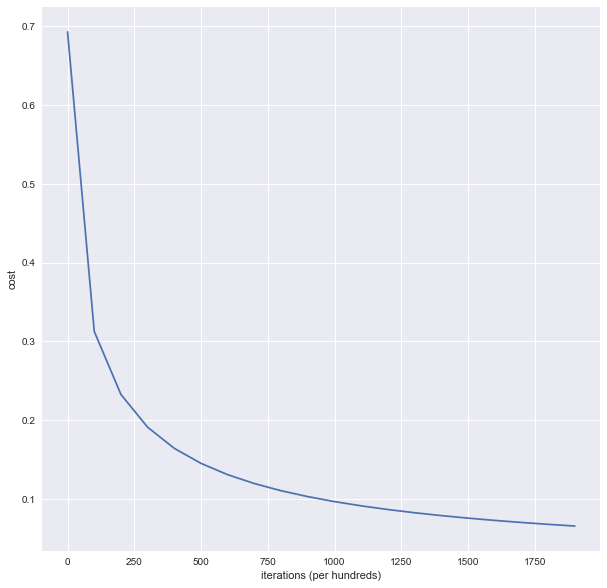

In [92]:
MY_first_logistic_reg_model = model(train_x_array,train_y_array,test_x_array,test_y_array,num_iterations = 2000,learning_rate = 0.03,print_cost = True,plot_cost_iteration = True)

In [86]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}